<a href="https://colab.research.google.com/github/BaekTree/TIBigdataMiddleware/blob/master/rnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

version : 다운 받은 데이터 버전

In [0]:
version = "integ-01integ-02integ-05integ"

In [168]:
import pandas as pd
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/Machine Learning/RNN/dataPrs'+version+'.csv')
data.columns.to_list()
data = data.drop_duplicates()

## 업로드한 데이터에서 불필요한 column들을 지운다.

In [170]:
for i in data.columns.to_list():
  if bool(i != "제목") ^ bool(i != "키워드") ^ bool(i != "주제"):
    print(i)
    data = data.drop([i], axis = 1)

Unnamed: 0
level_0
Unnamed: 0.1
index


## 데이터 정보 확인... 크기 혹은 주제...

## graph 그려서 보기

max length article :  13236
ave article length :  521.8927268725238


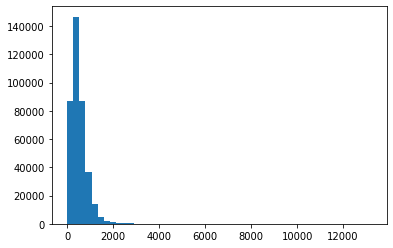

pol count :  65233
innt count :  51233
soc count :  56638
it count :  46144
cul count :  62727
eco count :  65730
spo count :  33919


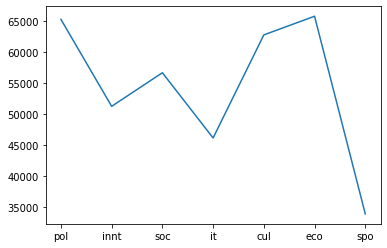

In [171]:
topicList = list(set(data.sort_values(by=["주제"])["주제"].to_list()))
data = data.astype(str)

keys = data["키워드"]
keys = keys.astype(str)

lst = keys.to_list()

print("max length article : ", max([len(i) for i in lst]))
print("ave article length : " , sum(map(len,lst))/len(lst) )

plt.hist([len(i) for i in lst], bins = 50)
plt.show()

y = []

import matplotlib.font_manager as fm
# plt.rcParams['font.family'] = 'NanumGothic'


font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)


for topic in topicList:
  sumVal = (data["주제"]==topic).sum()
  y.append(sumVal)
  print(topic ,"count : ", sumVal)

plt.xlabel("",fontproperties=fontprop)
plt.plot(topicList, y,)
plt.show()


## 개별 주제 확인해보기

In [175]:
data[data["주제"]=="it"].head(30)

,제목,키워드,주제
62487,군포시 마을버스 활용해 미세먼지 측정,활용 군포시 마을버스 미세 먼지 측정 앵커 미세먼지 마음 지자체들 대책 마련 고심 ...,it
62488,"동신대, 사이버 전문가 양성 도우미 ‘톡톡’",동신대 사이버 전문가 양성 도우미 동신대학교 에너지 융합 대학 융합 정보 보안전공 ...,it
62489,"‘스트레이트’, 신종 코로나바이러스 가짜 뉴스의 실태 [M+TV컷]",스트레이트 가짜 신종 코로나바이러스 가짜 실태 TV컷 신종 코로나 공포 세계 가짜 ...,it
62490,[케이블 위성 하이라이트]2020년 2월 11일,11일 2월 교양 요즘 책방 tvN 8시 리프킨 경제학자 제레미 노동 미래 예견서 ...,it
62491,"전주비전대, 코이카 글로벌연수사업 선정",전주비전대 선정 코이카 글로벌 연수 사업 전주비전대학교 지난달 코이카 KOICAㆍ한...,it
62492,"'생생정보' 돌판 짜장면, 300도 달궈진 뜨끈한 돌판 위에 짜장면X만두X튀김까지 푸짐",생생정보 돌판 짜장면 돌판 짜장면X만두X튀김 푸짐 2TV 생생 정보 맛집 돌판 짜장...,it
62493,"메드팩토, 항암제 개발 기대감 시간외 주가 10% ↑",메드팩토 항암제 기대감 항암제 시간외 주가 10% TGF-β 저해제 메드팩토 백토서...,it
62494,KBS교향악단 5G 클래식 VR 콘텐츠 제작 LG유플러스 앱으로 관람,KBS 교향악단 5G 클래식 VR 콘텐츠 제작 LG유플러스 관람 KBS교향악단 LG...,it
62495,"`서든어택` 넥슨지티 영업손실 287억원 ""내년 신작게임 출시""",서든어택 287억 넥슨지티 영업 손실 내년 신작 게임 출시 총싸움 게임 어택 유명 ...,it
62496,김병원 “화순 바이오메디컬 허브 반드시 구축”,김병원 화순 바이오메디컬 허브 구축 예비후보 김병원 더불어민주당 나주화순 국회의원 ...,it


## 데이터 셔플

In [123]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head(10)

,제목,키워드,주제
344791,"보잉 경영진, 조종사들 ‘운항 중단’ 묵살 B737맥스 사고 자초했나",보잉 경영진 중단 조종사들 운항 묵살 B737맥스 사고 자초 미국 항공 업체 보잉 ...,innt
43909,'양식의 양식' 열풍 불어도 마라탕이 짜장면 아성은 못 넘는다,양식 양식 열풍 마라탕 짜장면 아성 JTBC 양식 양식 추억 소환 짜장면 대표 서민...,cul
119781,"HUG, `주거복지 도시재생 부문` 대상 수상",HUG 주거복지 도시재생 대상 수상 주택도시보증공사 HUG 서울힐튼호텔 최고 소비자...,eco
312224,화웨이 사태에 대구경북 IT업계 기대와 우려 엇갈려,화웨이 사태 대구경북 IT업계 미국 중국 통신 장비 업체 화웨이 제재 경북 구미 지...,eco
166774,"영화가 현실로?...중국, 달에서 새싹 틔워",영화 현실 중국 새싹 중국 창어 탐사선 嫦娥 4호 뒷면 far side moon 식...,it
113900,"美연준, 만장일치로 기준금리 동결 '추가적 점진적 금리인상' 표현 삭제",연준 만장일치 기준금리 동결 추가적 점진적 금리인상 표현 삭제 미국 중앙은행 연방준...,eco
19864,줄줄이 휴점 유통가 ‘코로나 쇼크’,휴점 유통 코로나 쇼크 신종코로 확진자 방문 여파 롯데 본점 휴점 방역 돌입 이마트...,eco
295673,2019 의정부시 청소년위원회 워크숍,의정부시 청소년위원회 워크숍 청소년수련관 의정부시청소년육성재단 산하 청소년 수련관 ...,pol
11603,"[포토] 문재인 대통령, 신종 코로나바이러스 현장점검",문재인 대통령 현장점검 신종 코로나바이러스 현장 점검 문재인 대통령 28일 의료기관...,pol
163826,[투데이 영상] '어떤 스타일을 원해요?' 6살 '가위손',스타일 6살 가위손 가위 헤어드라이어 고객 머리 어린이 중국 쓰촨 친구 미용실 부모...,it


# nan 확인


In [124]:
# data.isnull()
data.isnull().sum()

제목     0
키워드    0
주제     0
dtype: int64

In [125]:
data.head(20)

,제목,키워드,주제
344791,"보잉 경영진, 조종사들 ‘운항 중단’ 묵살 B737맥스 사고 자초했나",보잉 경영진 중단 조종사들 운항 묵살 B737맥스 사고 자초 미국 항공 업체 보잉 ...,innt
43909,'양식의 양식' 열풍 불어도 마라탕이 짜장면 아성은 못 넘는다,양식 양식 열풍 마라탕 짜장면 아성 JTBC 양식 양식 추억 소환 짜장면 대표 서민...,cul
119781,"HUG, `주거복지 도시재생 부문` 대상 수상",HUG 주거복지 도시재생 대상 수상 주택도시보증공사 HUG 서울힐튼호텔 최고 소비자...,eco
312224,화웨이 사태에 대구경북 IT업계 기대와 우려 엇갈려,화웨이 사태 대구경북 IT업계 미국 중국 통신 장비 업체 화웨이 제재 경북 구미 지...,eco
166774,"영화가 현실로?...중국, 달에서 새싹 틔워",영화 현실 중국 새싹 중국 창어 탐사선 嫦娥 4호 뒷면 far side moon 식...,it
113900,"美연준, 만장일치로 기준금리 동결 '추가적 점진적 금리인상' 표현 삭제",연준 만장일치 기준금리 동결 추가적 점진적 금리인상 표현 삭제 미국 중앙은행 연방준...,eco
19864,줄줄이 휴점 유통가 ‘코로나 쇼크’,휴점 유통 코로나 쇼크 신종코로 확진자 방문 여파 롯데 본점 휴점 방역 돌입 이마트...,eco
295673,2019 의정부시 청소년위원회 워크숍,의정부시 청소년위원회 워크숍 청소년수련관 의정부시청소년육성재단 산하 청소년 수련관 ...,pol
11603,"[포토] 문재인 대통령, 신종 코로나바이러스 현장점검",문재인 대통령 현장점검 신종 코로나바이러스 현장 점검 문재인 대통령 28일 의료기관...,pol
163826,[투데이 영상] '어떤 스타일을 원해요?' 6살 '가위손',스타일 6살 가위손 가위 헤어드라이어 고객 머리 어린이 중국 쓰촨 친구 미용실 부모...,it


In [0]:
# data = data.iloc[:100000,:]


# 주제 지우기 함수

In [0]:
def removeTopic(top):
  data = data.drop(data[data["주제"] == top].index)

  y = []
  topicList = list(set(data.sort_values(by=["주제"])["주제"].to_list()))

  import matplotlib.font_manager as fm
  # plt.rcParams['font.family'] = 'NanumGothic'


  font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
  fontprop = fm.FontProperties(fname=font_path, size=18)


  for topic in topicList:
    sumVal = (data["주제"]==topic).sum()
    y.append(sumVal)
    print(topic ,"count : ", sumVal)

  plt.xlabel("",fontproperties=fontprop)
  plt.plot(topicList, y,)
  plt.show()

  y = []

  import matplotlib.font_manager as fm
  # plt.rcParams['font.family'] = 'NanumGothic'


  font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
  fontprop = fm.FontProperties(fname=font_path, size=18)


  for topic in topicList:
    sumVal = (data["주제"]==topic).sum()
    y.append(sumVal)
    print(topic ,"count : ", sumVal)

  plt.xlabel("",fontproperties=fontprop)
  plt.plot(topicList, y,)
  plt.show()


In [0]:
removeTopic("it")

# IT지우기

In [0]:
# data = data.drop(data[data["주제"].map(lambda i : i == "cul")].index)

max length article :  13236
ave article length :  537.2526238879639


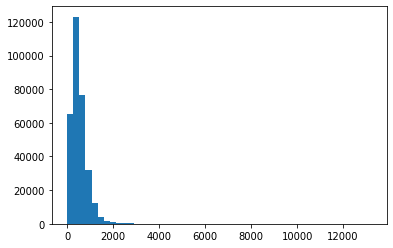

pol count :  65233
innt count :  51233
soc count :  56638
it count :  46144
eco count :  65730
spo count :  33919


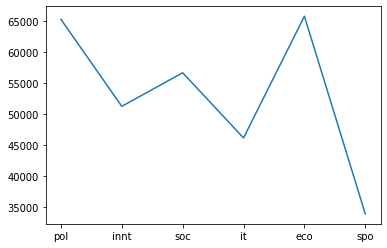

In [127]:
# topicList = list(set(data.sort_values(by=["주제"])["주제"].to_list()))
# data = data.astype(str)

# keys = data["키워드"]
# keys = keys.astype(str)

# lst = keys.to_list()

# print("max length article : ", max([len(i) for i in lst]))
# print("ave article length : " , sum(map(len,lst))/len(lst) )

# plt.hist([len(i) for i in lst], bins = 50)
# plt.show()

# y = []

# import matplotlib.font_manager as fm
# # plt.rcParams['font.family'] = 'NanumGothic'


# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=18)


# for topic in topicList:
#   sumVal = (data["주제"]==topic).sum()
#   y.append(sumVal)
#   print(topic ,"count : ", sumVal)

# plt.xlabel("",fontproperties=fontprop)
# plt.plot(topicList, y,)
# plt.show()


# Keras

In [0]:
from keras.preprocessing.text import Tokenizer

In [0]:
test = str(data["키워드"])

In [0]:
MAX_NB_WORDS = 5000
MAX_SEQUENCE_LENGTH = 500


In [0]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters = " ")
# 빈도가 높은 최대 50000개의 단어들로만 인덱싱

In [0]:
data["키워드"] = data["키워드"].astype(str)

In [133]:
tokenizer.fit_on_texts(data["키워드"].values)
#padas와 호완이 된다. string array을 넣는다.
# string array을 넣으면 각 string element에서 계산을 다 해서
# 단어들을 indexing한다.
# word_index : 전체 문서 셋에서 단어에 idx 매핑 전체 문서 셋에서 단어 빈도수 따라서 
# 빈도 수 높을 수록 낮은 숫자에 매핑. 단어 -> 숫자 매핑
# index_word : word_index의 반대 표현. object에서 숫자 -> 단어 매핑.
# 일단 indexing은...
"""
from : https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
fit_on_texts Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).
texts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.
"""




'\nfrom : https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do\nfit_on_texts Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).\ntexts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.\n'

In [134]:
word_index = tokenizer.word_index
print(f"found %s unique tokens." %len(word_index))

found 831393 unique tokens.


In [0]:
# tokenizer.word_index

In [0]:
# tokenizer.word_counts

In [0]:
# 위에서 각 단어 -> 정수 매핑했다.
# 이제 문서를 정수 표현으로 바꾼다.
X = tokenizer.texts_to_sequences(data["키워드"].values)


In [0]:
# len(X)
# X.shape

In [0]:
from keras.preprocessing.sequence import pad_sequences


In [140]:
X = pad_sequences(X, maxlen = MAX_SEQUENCE_LENGTH)
print("shape of data tensor: ", X.shape)

shape of data tensor:  (318897, 500)


In [141]:
X

array([[   0,    0,    0, ...,  410,  271,   96],
       [   0,    0,    0, ...,  129,  556,  146],
       [   0,    0,    0, ...,  258, 3046,  803],
       ...,
       [   0,    0,    0, ...,  493,   35, 4319],
       [   0,    0,    0, ...,  810,  102,   45],
       [   0,    0,    0, ..., 4464,   10,   24]], dtype=int32)

In [0]:
Y = pd.get_dummies(data["주제"]).values

In [143]:
print("shale of label tensor:", Y.shape)

shale of label tensor: (318897, 6)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 42)

In [146]:
print(X_train.shape, Y_train.shape)

(287007, 500) (287007, 6)


In [147]:
print(X_test.shape, Y_test.shape)

(31890, 500) (31890, 6)


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, Embedding, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping



In [0]:
# EMBEDDING_DIM = 256

# def runModel(EMBEDDING_DIM = 256, lstmLayer = 128, layerNum = 1, layerSet = [128], epochs = 2, batch_size = 64, reluDense = False, biDir = False, method = CuDNNLSTM):
#   model = Sequential()

#   model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
#   model.add(SpatialDropout1D(0.2))
#   if method == LSTM:
#     method = LSTM
#   if biDir == True:
#     print("biDir is True")
#     model.add(Bidirectional(method(lstmLayer,return_sequences=True)))

#     if layerNum > 1:
#       print("layer num > 1")
#       for i in range(layerNum - 1):
#         print("add ",i,"th layer")
#         model.add(method(lstmLayer,return_sequences=True)) 
#         model.add(Dropout(0.2))
#     elif len(layerSet) > 1:
#       print("len(layerSet) > 1")
#       for i, layerWid in enumerate(layerSet):
#         print("add ",i,"th layer")
#         model.add(method(layerWid,return_sequences=True)) 
#         model.add(Dropout(0.2)) 
#     else:
#       model.add(Bidirectional(method(lstmLayer)))
#   # model.add(method(128,return_sequences=True)) 
#   # model.add(Dropout(0.2))
#   # model.add(Dense(7, activation='softmax'))

#   # model.add(method(128,return_sequences=True)) 
#   # model.add(Dropout(0.2))

#   # model.add(method(128,return_sequences=True)) 
#   # model.add(Dropout(0.2))

#   # model.add(method(128,return_sequences=True)) 
#   # model.add(Dropout(0.2))
#   else:
#     # model.add(SpatialDropout1D(0.2))

#     if layerNum > 1:
#       for i in range(layerNum - 1):
#         print("add ",i,"th layer")
#         model.add(method(lstmLayer,return_sequences=True)) 
#         model.add(Dropout(0.2))
#     elif len(layerSet) > 1:
#       for i, layerWid in enumerate(layerSet):
#         print("add ",i,"th layer")
#         model.add(CuDNNLSTM(layerWid,return_sequences=True)) 
#         model.add(Dropout(0.2))

#   model.add(method(lstmLayer)) 
#   model.add(Dropout(0.2))

#   # model.add(Dense(32,activation='relu'))

#   # model.add(LSTM(100, dropout = 0.2, recurrent_dropout=0.2))

#   if reluDense == True:
#     model.add(Dense(EMBEDDING_DIM, activation = 'relu'))
#     model.add(Dropout(0.2))

#   model.add(Dense(9, activation='softmax'))
#   opt = tf.keras.optimizers.Adam(lr=1e-3, decay = 1e-5)
#   model.summary()
#   # model.compile(loss='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
#   # model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#   model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#   # epochs = 2
#   # batch_size = 64

#   history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#   #accuracy show
#   accr = model.evaluate(X_test,Y_test)
#   print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#   #accuracy graph
#   plt.title('Loss')
#   plt.plot(history.history['loss'], label='train')
#   plt.plot(history.history['val_loss'], label='test')
#   plt.legend()
#   plt.show();

#   plt.title('Accuracy')
#   plt.plot(history.history['acc'], label='train')
#   plt.plot(history.history['val_acc'], label='test')
#   plt.legend()
#   plt.show();

# 기본적인 모델
* 그런데 epoch =1, 과 2일 때 차이가 0.3이 난다. 에폭을 더 늘려서 시도해볼 필요성이 있어보인다.
* 에폭 = 2 -> 8.3
* 에폭 = 5- > 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 512)         2560000   
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 512)               2101248   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 1542      
Total params: 4,794,118
Trainable params: 4,794,118
Non-trainable params: 0
____________________________________________

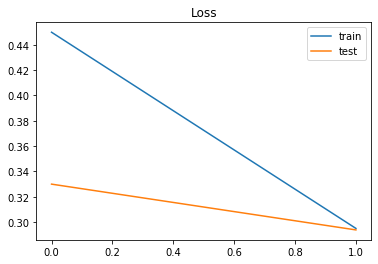

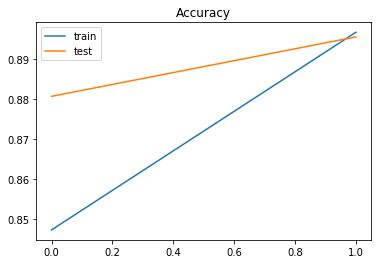

In [151]:


model = Sequential()
EMBEDDING_DIM = 512
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))

model.add(CuDNNLSTM(EMBEDDING_DIM)) 
model.add(Dropout(0.2))
model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(len(topicList), activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


epochs = 2
batch_size = 64
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#accuracy show
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#accuracy graph
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

## 버리기 dropout = 0.4
* 과적합을 없애보자!

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 512)         2560000   
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 512)               2101248   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 1799      
Total params: 4,794,375
Trainable params: 4,794,375
Non-trainable params: 0
____________________________________________

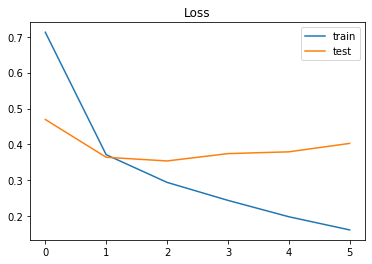

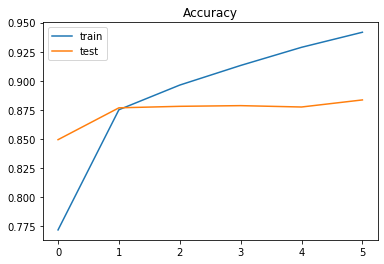

In [0]:


model = Sequential()
EMBEDDING_DIM = 512
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))

model.add(CuDNNLSTM(EMBEDDING_DIM)) 
model.add(Dropout(0.4))
model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(7, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


epochs = 10
batch_size = 64
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#accuracy show
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#accuracy graph
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

# biDirectional model
별 차이가 없다... 여전히 에폭 수를 늘리는 것을 고려해보아야...

In [0]:
model = Sequential()
EMBEDDING_DIM = 64
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
model.add(Bidirectional(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)))

# model.add(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)) 
model.add(CuDNNLSTM(EMBEDDING_DIM)) 
model.add(Dense(7, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


epochs = 10
batch_size = 64
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#accuracy show
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#accuracy graph
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

# dense 30을 추가한 모형
* 고만고만...

In [0]:
model = Sequential()
EMBEDDING_DIM = 64
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
# model.add(Bidirectional(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)))

# model.add(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)) 
model.add(CuDNNLSTM(EMBEDDING_DIM)) 
model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
model.add(Dense(9, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


epochs = 2
batch_size = 64
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#accuracy show
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#accuracy graph
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

# 노드 수 512
* 조금 커졌지만... 과적합

In [0]:
model = Sequential()
EMBEDDING_DIM = 512
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
# model.add(Bidirectional(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)))

# model.add(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)) 
model.add(CuDNNLSTM(EMBEDDING_DIM)) 
model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
model.add(Dense(9, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


epochs = 2
batch_size = 64
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#accuracy show
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#accuracy graph
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

# spatial layer 모형

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 512)         2560000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 512)         0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 512)               2101248   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 1799      
Total params: 4,794,375
Trainable params: 4,794,375
Non-trainable params: 0
_________________________________________________________________
Train on 76875 samples, validate on 8542 samples
Epoch 1/2
76875/76875 [==============================] - 142s

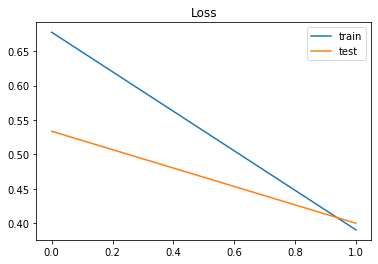

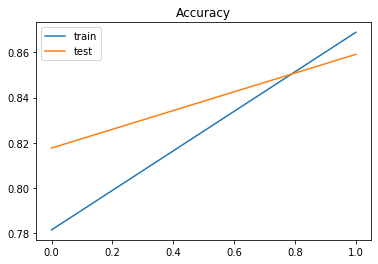

In [0]:
model = Sequential()
EMBEDDING_DIM = 512
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
# model.add(Bidirectional(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)))
model.add(SpatialDropout1D(0.2))

# model.add(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)) 
model.add(CuDNNLSTM(EMBEDDING_DIM)) 
model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


epochs = 2
batch_size = 64
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#accuracy show
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#accuracy graph
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [0]:
# 

In [0]:
model = Sequential()
EMBEDDING_DIM = 256
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
# model.add(Bidirectional(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)))
# model.add(SpatialDropout1D(0.2))

# model.add(CuDNNLSTM(EMBEDDING_DIM,return_sequences=True)) 
model.add(CuDNNLSTM(EMBEDDING_DIM)) 
model.add(Dense(EMBEDDING_DIM/2, activation='relu'))
model.add(Dense(9, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


epochs = 10
batch_size = 64
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#accuracy show
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#accuracy graph
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [0]:
runModel(64,64, layerNum=1, batch_size = 32, epochs = 2, reluDense=True)#, biDir = True

In [0]:
runModel(512,512, layerNum=1, batch_size = 256, epochs = 2, reluDense=True)#, biDir = True)

In [0]:
runModel(64,64, layerNum=8, batch_size = 256, epochs = 2, reluDense=True)#, biDir = True)

In [0]:
runModel(64,64, layerNum=3, batch_size = 256, epochs = 2, reluDense=True)#, biDir = True)

In [0]:
runModel(64,64, batch_size = 256, epochs = 2, reluDense=True, biDir = True)# batch size 128 was fine... not overfitting. Test overcomes trains.

In [0]:
runModel(64,64, batch_size = 128, epochs = 2, reluDense=True, biDir = True)

In [0]:
runModel(256,256)

In [0]:
runModel(512,256)

In [0]:
runModel(512,512)

In [0]:
runModel(128,128, layerNum = 2)

In [0]:
runModel(128,128, layerNum = 3)

In [0]:
runModel(128,128, layerNum = 3, batch_size = 32)

In [0]:
runModel(128,128, layerNum = 3, batch_size = 32, epoch = 10)

In [0]:
# max num : 50000 -> 5000
runModel(64,64, layerNum = 3, batch_size = 32, epochs = 10, reluDense=True)

In [0]:
runModel(64,64, batch_size = 32, epochs = 2, reluDense=True, biDir = True)

In [0]:
runModel(128,128, layerNum = 3, batch_size = 16)

In [0]:
runModel(128,128, layerNum = 3, batch_size = 128)

In [0]:
runModel(128,128, layerNum = 3, batch_size = 256)

In [0]:
runModel(512,512, epochs = 10)

In [0]:
runModel(256, 64, layerNum = 4)

In [0]:
runModel(256,256,epochs = 4)

In [0]:
runModel(256,256,batch_size = )

# 개별 테스트

In [0]:
test = ["""
봉준호 감독의 영화 '기생충'이 지난 9일(현지시간) 아카데미 시상식에서 4관왕을 차지한 뒤 정치권에서도 봉 감독과 '기생충'의 쾌거에 찬사를 보내고 있다. 자유한국당에서도 "기념비적인 사건"이라며 봉 감독을 치켜세웠는데, 진중권 전 동양대 교수는 이를 두고 "얼굴이 두텁다(두껍다)"고 비판했다.

진 전 교수는 11일 자신의 페이스북을 통해 "한국의 보수, 절망적이다"라고 했다. 진 전 교수는 "봉준호 감독은 블랙리스트에 올려놓고, CJ 이미경 부회장은 자리에서 끌어내려 미국으로 망명 보냈던 분들 아닌가"라며 "이제 와서 봉준호 감독의 쾌거에 숟가락 올려놓으려 하다니 얼굴도 참 두터우시다"라고 비꼬았다.

전날인 10일 박용찬 자유한국당 대변인은 '기생충' 오스카 수상 소식이 전해지자 논평을 내고 "한국 영화 기생충이 새로운 역사를 썼다"며 "지난해 칸영화제 황금종려상을 시작으로 연이어 들려온 놀라운 소식"이라고 했다. 한국당은 또 "전 세계에 한국 영화, 한국 문화의 힘을 알린 기념비적인 사건이라 할 수 있을 것"이라고 부연했다.

또 강효상 자유한국당 의원도 이날 자유한국당 원내대책회의에서 "대구신청사 옆 두류 공원에 '봉준호 영화박물관'을 건립해 대구신청사와 함께 세계적인 영화테마 관광메카로 만들겠다"고 말했다. 봉 감독이 대구출신이라는 이유에서 나온 발언이다.

이에 대해서도 진 전 교수는 박정희 전 대통령 생가복원 마인드라고 꼬집으면서 "이 소식이 외신으로 나가면 문화강국 한국의 이미지에 먹칠을 할 것"이라고 비난했다. 그러면서 "이분들, 마인드가 딱 70년대에 가 있다"고 비판하기도 했다.

이명박 정부 시기에는 봉 감독을 포함해 영화인 52명이 블랙리스트에 올랐다. 특히 당시 청와대 기획관리실에서 작성한 내부 문건에는 봉 감독의 영화 '괴물'을 "대중이 쉽게 접하고 무의식중에 좌파 메시지에 동조하게 만드는 좋은 수단인 영화를 중심으로 국민의식 좌경화 추진" 사례로 들었다.

문화예술계 블랙리스트 진상조사 및 제도개선위원회가 지난해 2월 발간한 '문화예술계 블랙리스트 진상조사 및 제도개선위원회 백서'에는 '괴물'을 포함해 '설국열차', '살인의 추억' 등 봉 감독의 영화 세 편이 블랙리스트 영화로 등장한다.

봉 감독 외에도 배우 송강호 역시 '문화체육관광부 9473명 명단'에 블랙리스트로 등장한다. 송강호는 문화예술인 594명이 2015년 5월 1일 발표한 '세월호 정부 시행령 폐기 촉구 성명'을 발표해 블랙리스트에 포함됐다.
"""]



In [0]:
seq = tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen = MAX_SEQUENCE_LENGTH)


In [0]:
pred = model.predict(padded)

In [0]:
labels = topicList

In [0]:
import numpy as np


In [165]:
print(pred, labels[np.argmax(pred)])
# pred

[[0.00486093 0.02850493 0.00742397 0.88261074 0.07146551 0.00513387]] it


In [0]:
model.save('drive/My Drive/Colab Notebooks/Machine Learning/RNN/my_model'+version+'.h5')


In [0]:
from tensorflow import keras
new_model = keras.models.load_model('drive/My Drive/Colab Notebooks/Machine Learning/RNN/my_model'+version+'.h5')


OSError: ignored

In [0]:
pred = model.predict(padded)
print(pred, labels[np.argmax(pred)])


[[0.94730633 0.00502064 0.01667797 0.01763796 0.0062179  0.00713924]] pol


In [0]:
test = ["""
 남북물류포럼 칼럼 제350호사드배치 알 박기, 진정 국익을 위한 것일까?추 원 서남북물류포럼 수석부회장지난달 말 롯데가 국방부와 성주골프장을 고고도미사일방어체계(THAAD·사드) 부지로 제공하는 계약을 체결한 이후, 한·중 간 갈등이 표면화되면서 중국의 보복이 노골화하고 있다. 거듭되는 중국의 반대와 경고에도 불구하고 한미 당국이 사드의 조기 배치 의지를 재천명하며 절차를 신속히 진행하는 움직임을 보이자, 중국은 이미 시행되던 경고성 조치를 넘어 롯데에 대한 '보복'을 시작으로 전방위 경제 및 문화 보복에 나서고 있다. 경제적 측면에서 당장 예상되는 커다란 손실은 물론, 앞으로 정치․외교․사회․군사 등 여러 방면에서도 심대한 피해와 후유증이 우려되고 있다. 만일, 사태가 장기화한다면 지난 25년 간 어렵게 축적해온 중국인의 한국에 대한 신뢰와 우호적 정서마저 크게 손상될 것이라는 것은 불문가지다. 물론, 상호의존도가 높은 글로벌 경제 하에서 중국이 입을 손실 역시 작지는 않을 것이다. 우리는 중국의 보복조치를 유감스럽게 생각하면서도, 중국이 사드배치를 왜 그토록 강하게 반대하는 상황에서 한국 정부가 알박기 하듯, 서둘러 사드 배치를 강행하는 것이 과연 국가의 장래에 도움이 될 것인지를 생각해 볼 필요가 있다. 결론부터 말한다면 현 정부는 사드 배치의 성급한 추진을 잠정 중단하고 차기 정부에 넘기는 것이 합당하고 현명하다는 것이다. 그 이유는 다음과 같다.첫째, 사드배치는 북한 핵 위협에 대처하는 방위적 조치라는 말로 설명할 수 있는 단순한 문제가 아니기 때문이다. 사드배치는 동북아 안보지형과 세력균형을 근본적으로 흔드는 사건이다. 중국이 반대하는 이유는 바로 여기에 있다. 미국은 부상하는 중국을 견제하기 위해 일본의 군사대국화를 용인하면서, 한국을 묶는 전략을 구사하고 있다. 중국은 사드가 미국의 대중국 포위전략의 일환이며, 액스밴드 레이더를 통해 자신을 근접거리에서 감시함으로써 유사 시 중국의 대응능력을 크게 훼손할 것을 우려하고 있다. 또한 이를 계기로 한국이 미국과 일본이 추진하는 미사일방어망(MD)에 편입되어 자신을 향해 칼날을 겨누게 될 것을 우려한다. 이에 대해 한국 정부는 사드배치는 어디까지나 북한의 핵·미사일 위협에 대비하기 위한 방위용이며 미국이 추진하는 MD 참여와는 관련이 없다는 것을 누차 강조해왔다. 실제로 한국은 김대중 정부 이래 지역 MD 체계 편입에 반대한다는 입장을 유지해 온 것이 사실이다. 3분 내외면 북한 미사일이 한국에 도달할 수 있기 때문에 MD의 효용성이 낮을 뿐 아니라, 자칫하면 미․중 간 군사적 대립에 말려들 소지가 있다고 보았기 때문이다. 그러나 최근 미국의 의도가 한국을 미사일 방어망에 편입시키려는 것에 있음이 밝혀짐으로써 한국 정부의 주장이 무색하게 되고 말았다. 지난 2월 23일 트럼프 대통령은 “한국과 일본에 미사일 방어체계(MD)를 강화하겠다”며 한국을 특정하여 MD 편입을 시사한 것이 그것이다. 따라서 중국에 있어 사드배치는 미·중 간 군사적 완충지대 역할을 자임해오던 한국이 미국 및 일본의 미사일 공동망의 참여를 통해 중국에 대항하겠다는 것이나 마찬가지가 되었다. 해양세력과 대륙세력의 파워게임에 한국이 해양세력의 편을 들어 중국에 맞서는 형국이 되는 것이다. 둘째, 성급한 사드 배치 추진은 자칫하면 군사적 자주권의 상실과 한반도의 발칸화로 이어질 가능성이 높다는 점이다. 만일, 중국의 양해 없이 사드배치가 이루어졌다고 가정해 보자. 우리 사회 일각에서 주장하는 것처럼 당장은 중국의 압력에 맞서 군사적 주권을 지켰다고 큰소리칠 수는 있다. 그러나 이후의 상황은 어떻게 전개될까? 한국은 앞으로 북한 외에 중국과 러시아의 위협에 대처하기 위해 군사력을 더욱 증대할 수밖에 없다. 또한 어쩔 수 없이 미국에게 안보를 더욱 의존하지 않으면 안 되는 상황에 내몰리게 될 것이다. 미국은 당연히 한국의 부담 하에 사드의 추가배치를 요구할 것이며, 동중국해와 남중국해에서 중국의 군사력을 견제할 목적으로 제주나 진해항에 줌왈트호 등 미해군력의 배치 허용을 요구할 것이다. 이때 한국은 중국의 위협을 의식, 미국의 요구를 들어주지 않을 수 없게 된다. 한반도 평화와 안정을 위한 한·미동맹이 동아시아에서 미국의 군사적 이익을 추종하는 공격적 동맹으로 변질됨으로써 ‘한반도의 발칸화’라는 최악의 안보불안을 자초하게 될 것이다.셋째, 사드의 군사적 효용성을 포함한 배치의 적합성에 대한 신중한 검토가 필요하기 때문이다. 지난해 사드 배치 결정 과정은 국내에서 충분한 논의와 검토 없이 이루어졌다. 주무부처인 국방부마저 앞뒤가 맞지 않는 논리로 사드배치의 타당성만 강조했다. 의사결정 메커니즘의 허술함을 짐작하게 하고도 남는다. 정부는 물론, 국회 내에서라도 충분한 논의와 공론 과정을 거쳤더라면 사드배치의 부적합에 따른 대안을 모색했을 것이다. 설사 불가피하게 필요하다는 판단에 이르렀더라도 국민들을 충분히 설득하고 이웃인 중국의 우려를 덜어주는 방안을 강구함은 물론, 설득할 수 있는 시간적 여유를 확보할 수 있었을 것이다. 넷째, 북핵문제 해결과 한반도 평화통일이라는 대의를 위해서라도 반드시 중국의 협력을 얻는 외교적 노력이 절실하기 때문이다. 북핵문제 해결의 주요 당사자인 중국을 적대시한다면 앞으로 과연 중국이 북핵문제 해결에 적극적으로 나설 수 있을까? 북한 핵은 기정사실화 되고 다시는 북한 핵문제를 해결할 수 있는 기회를 갖지 못하게 될 것이다. 뿐만 아니라 향후 남북의 통일과정에서 중국은 한국의 통일을 지지하고 협력하는데 주저하게 될 것이다. 마지막 이유는 차기 정부가 나서서 남북관계 복원을 포함한 큰 그림 속에서 사드배치와 핵문제 등 현안을 해결할 수 있도록 해주는 것이 정치적 도의라고 믿기 때문이다. 국내외적으로 사면초가에 처해있는 현 정부가 굳이 엄청난 희생을 무릅쓰고서라도 사드의 신속한 배치를 결행해야 할 만큼 절실하고 시급한 상황에 처해 있는 지 자문해볼 필요가 있다. 만일 그게 아니라면 지금이라도 미국에 양해를 구하여 사드 배치 추진 문제를 차기 정부에 넘기는 것이 올바른 선택일 것이다. 갓 취임한 트럼프 대통령 역시 그것이 선거로 선출되는 민주주의 정부에서 오히려 당연한 도리라는 점을 누구보다도 잘 이해하고 있을 것이다.(끝) 김정남  |   2017-03-08        지난 10년간 천문학적인 국방비를 지출하면서도 왜 핵개발을 추진하지 않아서 이런 형국까지 당하는지 이해를 하기가 힘들다.돈이 없는가? 기술이 없는가? 모두 있으면서도 유독 핵우산에 의존한 당연한 귀결이니 답답할 뿐이다. 함무라비법전에도 있듯이 핵에는 핵으로 균형을 맞추어야 한다. 최소의 비용으로 최대의 공포를 줄 수 있는 핵개발을 북한이 포기할 까닭이 없다.지금이라도 늦지 않았으니 당당하게 자위차원에서 핵개발을 선언하여야 한다. 그래야 중국에게도 공격의 빌미를 주지 않고 핵의 균형을 갖춰서 정은이 망나니가 우쭐대지 못하고 대화의 광장으로 나올 가능성이 조금이라도 높아진다. 남의 힘을 빌려 내집을 지키다보면 결국 살림살이 모두 내어주며 바보가 되고 그 피해는 고스란이 한민족전체에게 돌아간다.미국도 힘쎈자는 대우한다. 일본을 대하는 그들의 태도가 이를 여실히 보여주지 않는가! 곽태환  |   2017-03-06        추원서 박사가 사드의 실전배치를 다음 정권에 넘기자는 5가지 이유를 잘 정리해줘서 감사하고 공감한다. 한미정부가 사드배치결정의 단순한 안보논리는 북한의 핵. 미사일 위협에 대응하여 사드배치 한다는 논리이다. 이러한 안보논리의 기본적인 전제조건이 오류가 있다. 북한이 핵전쟁을 한다는 가정이다. 만약 북한이 핵탄두 미사일 발사 결정은 무엇을 의미하는가? 북한이 핵 전쟁을 각오하고 핵미사일을 남쪽을 향하여 발사해야 한다는 것은 핵전쟁을 하겠다는 것인데 이것은 자살행위이고 과연 핵전쟁을 할 의도가 있다고 가정이 오류가 아닌가? 북한은 핵억지력을 강화하는 이유는 핵전쟁을 방지하기 위해 자위권차원에서 핵무기를 보유한다고 하는데 만약 핵 억지력이 깨지면 핵전쟁이 발생하는데 이것은 공멸을 의미하는데 사드가 불필요하게 될 것이다. 사드가 어떻게 핵 전쟁을 예방 할 수 있는지 한미군부에게 묻고 싶다.
"""]

In [0]:
def clsfy(test):
  seq = tokenizer.texts_to_sequences(test)
  padded = pad_sequences(seq, maxlen = MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  print(pred, labels[np.argmax(pred)])


In [0]:
clsfy(test)

[[1.4369380e-04 7.2861250e-05 1.3471409e-03 9.9801648e-01 3.7061307e-04
  4.9278435e-05]] innt


# real data test

In [0]:
# from tensorflow import keras

# new_model = keras.models.load_model('drive/My Drive/Colab Notebooks/Machine Learning/RNN/my_model1201.h5')



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [153]:
kubic = pd.read_json("drive/My Drive/Colab Notebooks/Machine Learning/RNN/refined620.json")
# kubic.head(5)
# print(kubic["tokenized_doc"][0])
for i in range(kubic.shape[0]):
  kubic.loc[i,"tokenized_doc"] = " ".join(kubic["tokenized_doc"][i])
# for i in range(len(data.index)):
#   data.loc[i,"키워드"] = str(data.loc[i]["키워드"]).replace(","," ")
kubic.head(2)

,idList,titles,tokenized_doc
0,5de110274b79a29a5f987f1d,2012년 3차 대북정책 추진에 관한 정책건의 보고서,대북 정책 추진 정책 건의 원칙 입각 대북 정책 성과 과제 정치 한반도 평화 국제 ...
1,5de1102a4b79a29a5f987f39,2017년 3차 통일정책 추진에 관한 정책건의 보고서,상임 위원회 대북 통일 정책 추진 정책 건의 평화 한반도 구현 과제 민주 평화통일 ...


In [0]:
kubic["주제"] = None


In [0]:
import numpy as np

In [0]:
for i, cont in enumerate(kubic["tokenized_doc"]):
  test = []
  test.append(cont)
  seq = tokenizer.texts_to_sequences(test)
  padded = pad_sequences(seq, maxlen = MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  #pol innt soc cul eco spo
  labels = topicList
  # labels = ['pol', 'eco', 'cul', 'innt', 'spo', 'soc']
  kubic.loc[i,"주제"] = labels[np.argmax(pred)]
  # print(kubic["post_title"][i] , " : ", labels[np.argmax(pred)])
  # print(pred, labels[np.argmax(pred)])

In [157]:
for top in topicList:
  print(kubic[kubic["주제"]==top][["tokenized_doc","주제"]].head(20),"\n")

                                         tokenized_doc   주제
47                                     토론 회원 신고 게시물 신고  pol
55   취업 사이트 이용 자신 개인 정보 안전 관리 가지 주의 사항 최근 취업 사이트 유령...  pol
60   탈북자 동지 자원 봉사 신청서 서식 내용 작성 담당자 메일 신청 접수 자원 봉사 신...  pol
64                         이후 입국 해당 내용 회원 아침 신고 게시물 신고  pol
65   북한이탈주민 보호 정착 지원 법률 시행 규칙 일부 개정 통일 부령 목적 규칙 북한이...  pol
69   국내 입국 새터민 시대 새터민 우리 사회 안정 정착 자립 지원 체계 마련 추진 배경...  pol
86                                            첨부 파일 클릭  pol
87                                            첨부 파일 클릭  pol
89                                            첨부 파일 클릭  pol
90                                            첨부 파일 클릭  pol
91                                            첨부 파일 클릭  pol
92                                            첨부 파일 클릭  pol
93                                            첨부 파일 클릭  pol
94                                            첨부 파일 클릭  pol
95                                            첨부 파일 클릭  pol
219  크루트 온라인 채용 대표 사이트 국내 최초 인터넷 채용 시스템 

max length article :  1
ave article length :  1.0


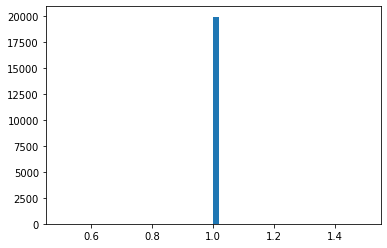

pol count :  36
innt count :  64
soc count :  11
it count :  401
eco count :  51
spo count :  1


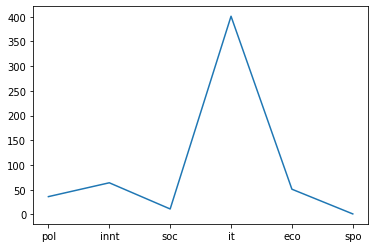

In [158]:
kubicList = list(set(kubic.sort_values(by=["주제"])["주제"].to_list()))
kubic = kubic.astype(str)

keys = kubic["tokenized_doc"][0]
# keys = keys.astype(str)

# lst = keys.to_list()
lst = keys
print("max length article : ", max([len(i) for i in lst]))
print("ave article length : " , sum(map(len,lst))/len(lst) )

plt.hist([len(i) for i in lst], bins = 50)
plt.show()

y = []

import matplotlib.font_manager as fm
# plt.rcParams['font.family'] = 'NanumGothic'


font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)


for topic in kubicList:
  sumVal = (kubic["주제"]==topic).sum()
  y.append(sumVal)
  print(topic ,"count : ", sumVal)

plt.xlabel("",fontproperties=fontprop)
plt.plot(kubicList, y,)
plt.show()


In [0]:
kubic[kubic["주제"]==topic]

# 자꾸 정치 쪽 ARTICLE이 IT으로 분류 된다. 어덯게 it로 학습한건지 확인...

In [0]:
print((data["주제"]=="spo").sum())
# print(data[data["주제"]=="it"].head(30))

7391
